# Fig. 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import xarray as xr 
import seaborn as sns
import matplotlib.lines as mlines
plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams.update({'font.size': 20})

import warnings
warnings.filterwarnings("ignore")



## Funtions 

In [2]:
def quantile_height(ds, var="Qpassive_1", quantile=0.05):
    """
    Calculates the height above which a specified quantile percentage of the given variable are located.
    Primarily used with 'Qpassive_1' to determine the injection height.

    Parameters:
    ds (xarray.Dataset): The dataset containing the variable of interest.
    var (str): The variable name to use for calculation (default is "Qpassive_1").
    quantile (float): The quantile value (e.g., 0.05 for 5%) to determine the height threshold (default is 0.05).

    Returns:
    xarray.DataArray: The minimum height where the specified quantile condition is met.
    """
    
    ds = ds.mean(("lat", "lon"))
    rho = dens(ds)
    dz = -1 * z.differentiate("height")
    qplume = ds[var] * rho.values * dz.values
    qplume_sum = qplume.cumsum(dim="height")
    qplume_100 = qplume_sum.max(dim="height")
    qplume_q = qplume_100 * quantile
    height_q = ds['height'].where(qplume_q < qplume_sum)
    height_q_min = height_q.max(dim="height")

    return height_q_min


def dens(d): 
    R = 287.1
    densitiy = d.pres / (R * d.temp)
    return densitiy

In [3]:
def override_height(ds, z):
    return ds.assign_coords(height=z.values)

## Get Data

In [4]:
ds_freitas = xr.open_mfdataset("./freitas_heights.nc", engine = 'netcdf4')

In [5]:
data_path = "../data/"
dsref = xr.open_mfdataset(data_path + "exp_ref.nc", engine = 'netcdf4').isel(time = slice(2,None)).mean("time").squeeze()

z = xr.open_mfdataset("./height_info.nc").mean("time").squeeze().mean(("lat", "lon"))["z_mc"]/1000
z = z.assign_coords(height=dsref.height)

In [6]:
#50
ds05 = override_height(xr.open_mfdataset(data_path + "exp_005.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze(),z)
ds06 = override_height(xr.open_mfdataset(data_path + "exp_006.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze(),z)
ds07 = override_height(xr.open_mfdataset(data_path + "exp_007.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze(),z)
ds08 = override_height(xr.open_mfdataset(data_path + "exp_008.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze(),z)
list50 = [ds05, ds06, ds07, ds08]
sh50 = [35, 40, 45, 50]


#75
ds10 = override_height(xr.open_mfdataset(data_path + "exp_010.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze(),z)
ds11 = override_height(xr.open_mfdataset(data_path + "exp_011.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze(),z)
ds12 = override_height(xr.open_mfdataset(data_path + "exp_012.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze(),z)
ds13 = override_height(xr.open_mfdataset(data_path + "exp_013.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze(),z)
list75 = [ds10, ds11, ds12, ds13]
sh75 = [52.5, 60, 67.5,75]


#100
ds14 = override_height(xr.open_mfdataset(data_path + "exp_014.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze(),z)
ds15 = override_height(xr.open_mfdataset(data_path + "exp_015.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze(),z)
ds16 = override_height(xr.open_mfdataset(data_path + "exp_016.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze(),z)
ds17 = override_height(xr.open_mfdataset(data_path + "exp_017.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze(),z)
list100 = [ds14, ds15, ds16, ds17]
sh100 = [70,80,90,100]


#150
ds18 = override_height(xr.open_mfdataset(data_path + "exp_018.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze(),z)
ds19 = override_height(xr.open_mfdataset(data_path + "exp_019.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze(),z)
ds20 = override_height(xr.open_mfdataset(data_path + "exp_020.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze(),z)
ds21 = override_height(xr.open_mfdataset(data_path + "exp_021.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze(),z)
list150 = [ds18, ds19, ds20, ds21]
sh150 = [105, 120, 135, 150]


#200
ds25 = override_height(xr.open_mfdataset(data_path + "exp_025.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze(),z)
ds26 = override_height(xr.open_mfdataset(data_path + "exp_026.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze(),z)
ds27 = override_height(xr.open_mfdataset(data_path + "exp_027.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze(),z)
ds28 = override_height(xr.open_mfdataset(data_path + "exp_028.nc", engine = 'netcdf4').isel(time = slice(3,None)).squeeze(),z)
list200 = [ds25, ds26, ds27, ds28]
sh200 = [140, 160, 180, 200]

ds = ds05


## Prepare Plot

In [7]:
steps = ["30%","20%", "10%","0%"]
sets_names = [f"50$\,$kW$\,$m$^{{-2}}$" , f"75$\,$kW$\,$m$^{{-2}}$", f"100$\,$kW$\,$m$^{{-2}}$", f"150$\,$kW$\,$m$^{{-2}}$",f"200$\,$kW$\,$m$^{{-2}}$"]


colors = ["#e67410","#483D8B", "#B22222", "#2E8B57", "#fbc740"]

styles = ["o", "s", "<", "X"]
lstyles = ["-", "--"]
list_of_lists = [ list50, list75 ,list100, list150, list200]
list_of_fluxes = [sh50, sh75 ,sh100, sh150, sh200]

In [8]:
# Prepare Freitas Data
frflux = ds_freitas.sh_flux
frinj = ds_freitas.inj_h.values

# Get height values and corresponding pressure levels from the z dataset
height_values = z.values
pressure_levels = z.height.values

# Initialize an array to store the corresponding pressure levels for the injection heights
freitas_ph = np.empty(len(frinj))

# Function to find the nearest pressure level for a given height
def find_nearest_pressure_level(height, height_values, pressure_levels):
    # Calculate the absolute difference between the height and all available heights
    differences = np.abs(height_values - height)
    # Get the index of the minimum difference
    nearest_index = np.argmin(differences)
    # Return the corresponding pressure level
    return pressure_levels[nearest_index]

# Populate the array with the nearest pressure levels
for i, height in enumerate(frinj):
    freitas_ph[i] = find_nearest_pressure_level(height, height_values, pressure_levels)

## Plot Figure

In [9]:
# Set some variables for the plot
q1 = 0.05
q2 = 0.5
quantiles = [q1, q2]
quantiles_label = ["Plume top height", "Median height"]
handles_legend2 = []
y_ticks = np.arange(2,14,2)

Done with set: 1
Done with set: 2
Done with set: 3
Done with set: 4
Done with set: 5


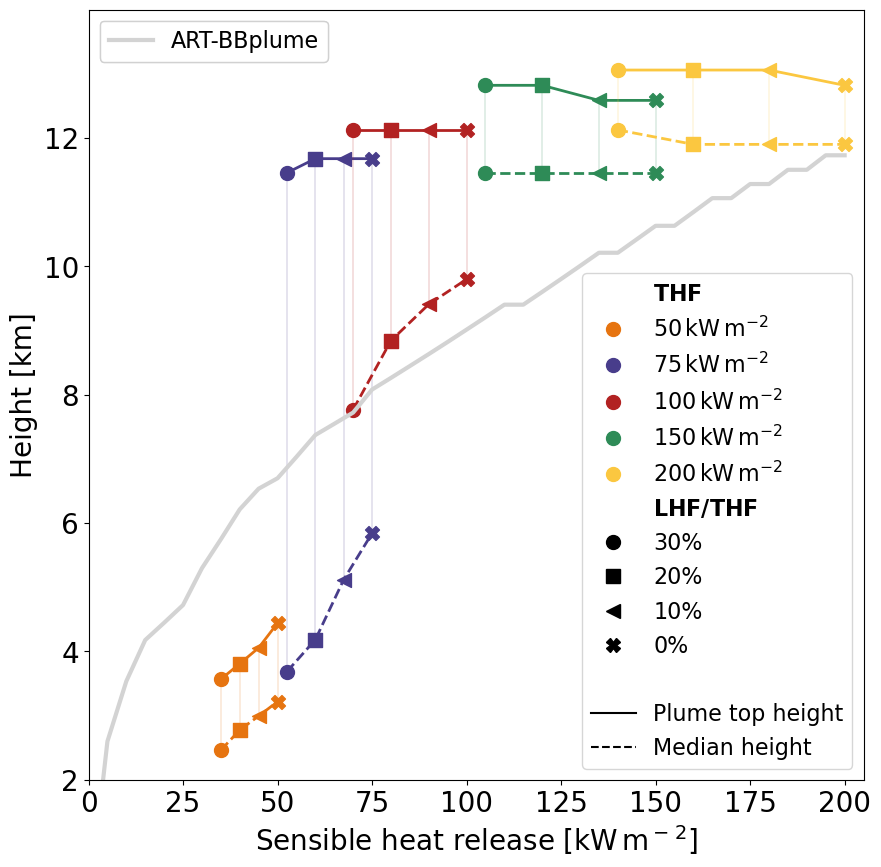

In [10]:
fig, ax = plt.subplots(1, figsize=[10, 10])

# Loop through sets
for i, iset in enumerate(list_of_lists):
    sh_list = list_of_fluxes[i]

    quants1 = []
    quants2 = []
    # Calculate Injcection heights
    for j, ds in enumerate(iset):
        quants1 = np.append(quants1, quantile_height(ds.mean("time"), quantile=q1))
        quants2 = np.append(quants2, quantile_height(ds.mean("time"), quantile=q2))
        ax.scatter(sh_list[j], quants1[j], color=colors[i], marker=styles[j], s=100)
        ax.scatter(sh_list[j], quants2[j],  color=colors[i], marker=styles[j], s=100)
        ax.vlines(sh_list[j], ymin=quantile_height(ds.mean("time"), quantile=q1), ymax=quantile_height(ds.mean("time"), quantile=q2), colors=colors[i], linewidths = 0.2)
        
    
    
    ax.plot(sh_list, quants1, color = colors[i], linewidth = 2 )
    ax.plot(sh_list, quants2, color = colors[i], linewidth = 2 , linestyle = "--")
    
    print("Done with set: " + str(i+1))    

# Plot Freitas
freitas = ax.plot(frflux,frinj/1000, linewidth = 3, color = "lightgrey")    
handles_legend2.append(freitas)

# Make Axis nice
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks)
ax.set_ylim(2, 14)
ax.set_xlim(0, 205)
ax.set_xlabel(f"Sensible heat release [kW$\,$m$^-$$^2$]")
ax.set_ylabel(f"Height [km]")


# Create legend handles for colors
color_handles = [mlines.Line2D([], [], color=color, marker='o', linestyle='None', markersize=10, label=sets_names[i]) for i, color in enumerate(colors)]
# Create legend handles for marker styles
style_handles = [mlines.Line2D([], [], color='black', marker=style, linestyle='None', markersize=10, label=steps[j]) for j, style in enumerate(styles)]
line_handles  = [mlines.Line2D([], [], color='black', marker='None', linestyle=lstyle, markersize=10, label=quantiles_label[k]) for k, lstyle in enumerate(lstyles)]
# Set Titels for the Legend
color_title_handle = mlines.Line2D([], [], color='none', marker='', linestyle='None', label= r'$\bf{THF}$')
style_title_handle = mlines.Line2D([], [], color='none', marker='', linestyle='None', label=r'$ \bf{LHF} / \bf{THF}$')
line_title_handle = mlines.Line2D([], [], color='none', marker='', linestyle='None', label= r'$\bf{}}$')
# Put Legend together
handles = [color_title_handle] + color_handles + [style_title_handle] + style_handles + [line_title_handle] + line_handles

# Add legends to the plot
legend1 = ax.legend(handles=handles, loc='lower right', fontsize = 16)
ax.add_artist(legend1)
# Add second legend
legend2 = ax.legend(handles=freitas, labels=["ART-BBplume"], loc='upper left', fontsize = 16)
ax.add_artist(legend2)


# Save the figure
my_path = "./figs/"
fig.savefig(my_path + 'fig08.png', dpi=300, bbox_inches='tight')
fig.savefig(my_path + 'fig08_lq.png', dpi=50, bbox_inches='tight')
